# Mobile Price Range Prediction

## Problem Statement

There is a new mobile company and the CEO wants to give tough fight to big companies like Apple,Samsung etc.

He has no idea of how to estimate price of mobiles his company creates. A simple assumption of the prices will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies.

Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price.
You have to predict a price range indicating how high the price is.

## Data Definition

**battery_power:** Total energy a battery can store in one time measured in mAh<br> 

**clock_speed:** Speed at which microprocessor executes instructions<br>

**fc:** Front Camera mega pixels<br>

**int_memory:** Internal Memory in Gigabytes<br>

**m_dep:** Mobile Depth in cm<br>

**mobile_wt:** Weight of mobile phone<br>

**n_cores:** Number of cores of processor<br>

**pc:** Primary Camera mega pixels<br>

**px_height:** Pixel Resolution Height<br>

**px_width:** Pixel Resolution Width<br>

**ram:** Random Access Memory in Mega Bytes<br>

**sc_h:** Screen Height of mobile in cm<br>

**sc_w:** Screen Width of mobile in cm<br>

**talk_time:** longest time that a single battery charge will last when you are<br>

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## Exploratory Data Analysis and Data preparation

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score,f1_score, classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import tree
import graphviz
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
from warnings import filterwarnings

In [55]:
filterwarnings("ignore")
pd.options.display.max_columns =None

In [56]:
df =pd.read_csv("Project 7 - K Nearest Neighbors/Dataset/Mobile_data.csv")
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


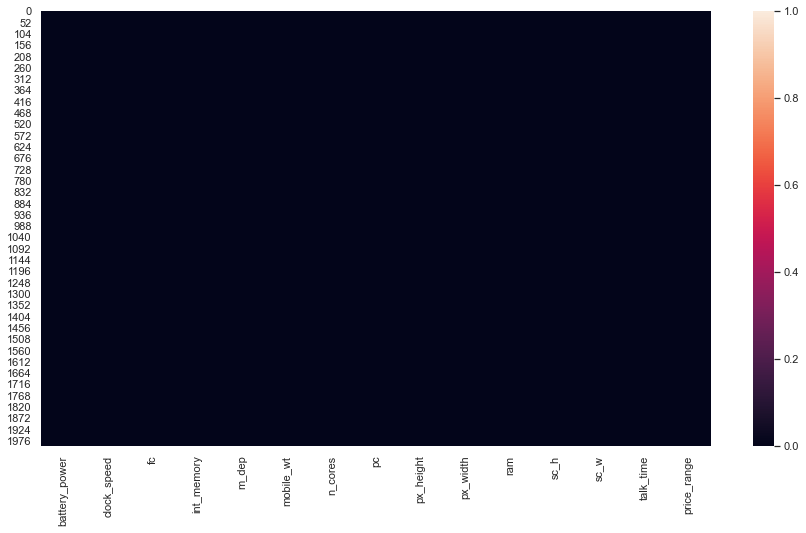

In [116]:
sns.heatmap(df.isnull(), vmin = 0, vmax = 1)
plt.show()
## No null values

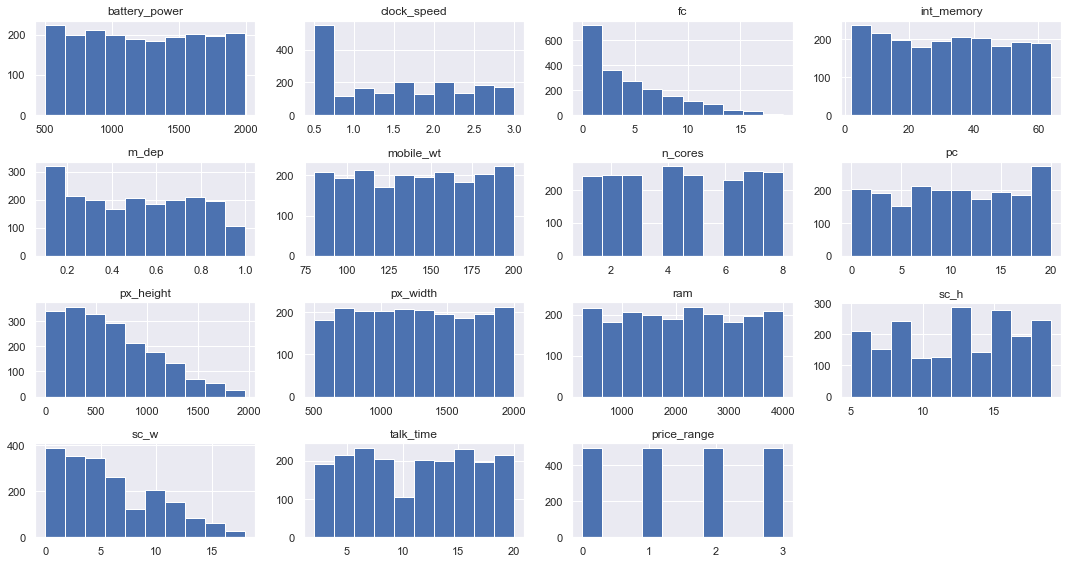

In [58]:
plt.rcParams['figure.figsize'] = [15,8]
sns.set()
df.hist()
plt.tight_layout()
plt.show()

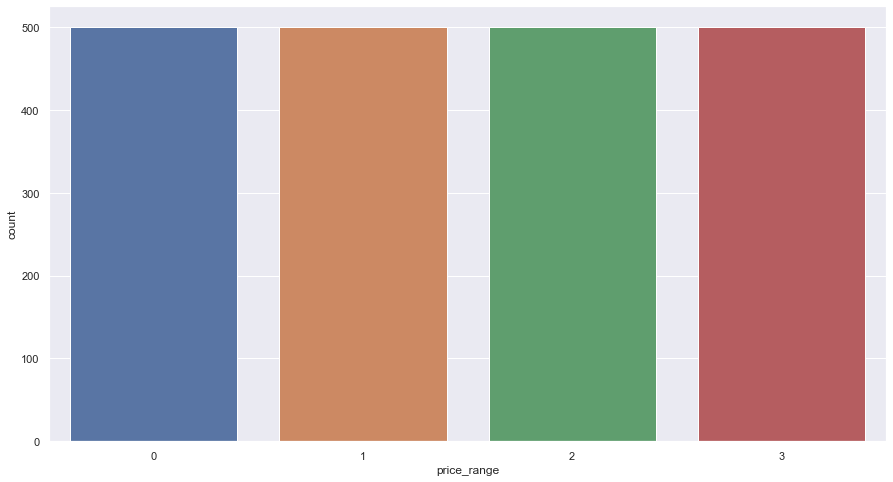

In [59]:
sns.countplot(df.price_range)
plt.show()

In [60]:
df.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


<AxesSubplot:>

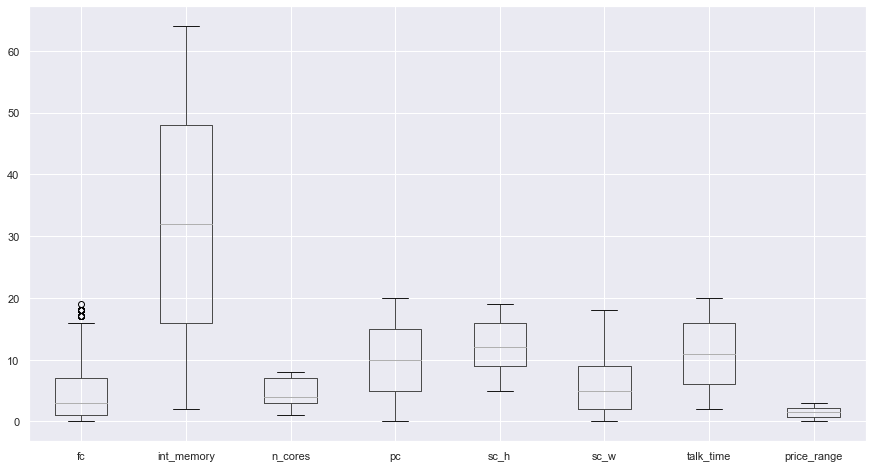

In [62]:
df.drop(["battery_power","mobile_wt","px_height","px_width","ram","m_dep","clock_speed"], axis=1).boxplot()

<AxesSubplot:>

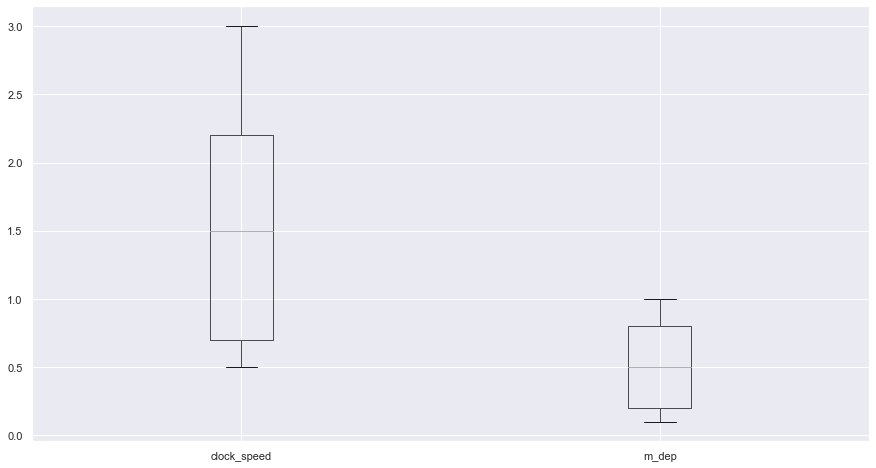

In [63]:
df[["clock_speed","m_dep"]].boxplot()

<AxesSubplot:>

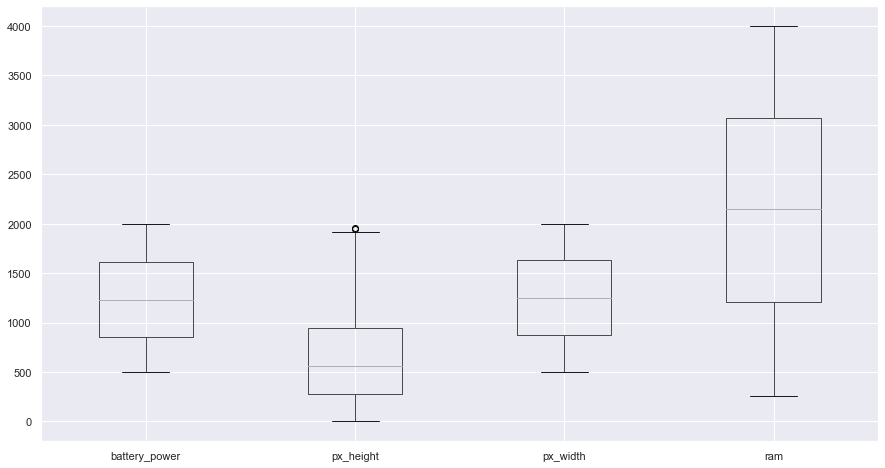

In [64]:
df[["battery_power","px_height","px_width","ram"]].boxplot()

<AxesSubplot:xlabel='mobile_wt'>

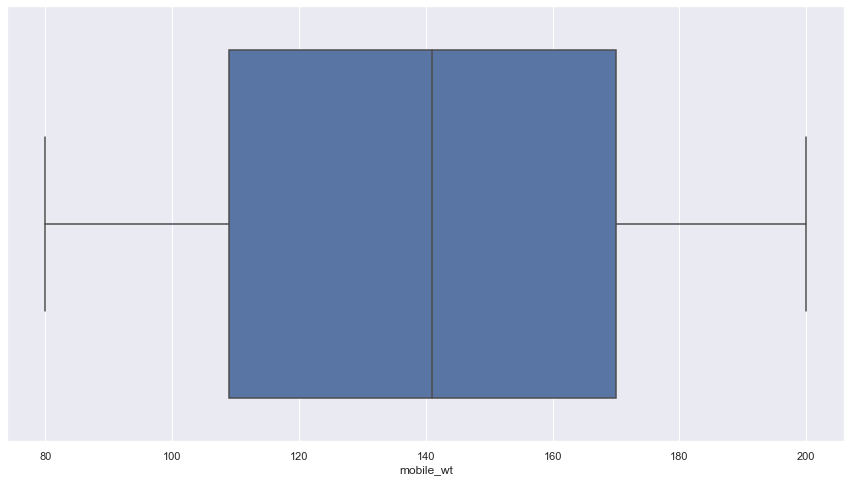

In [65]:
sns.boxplot(df.mobile_wt)

<AxesSubplot:>

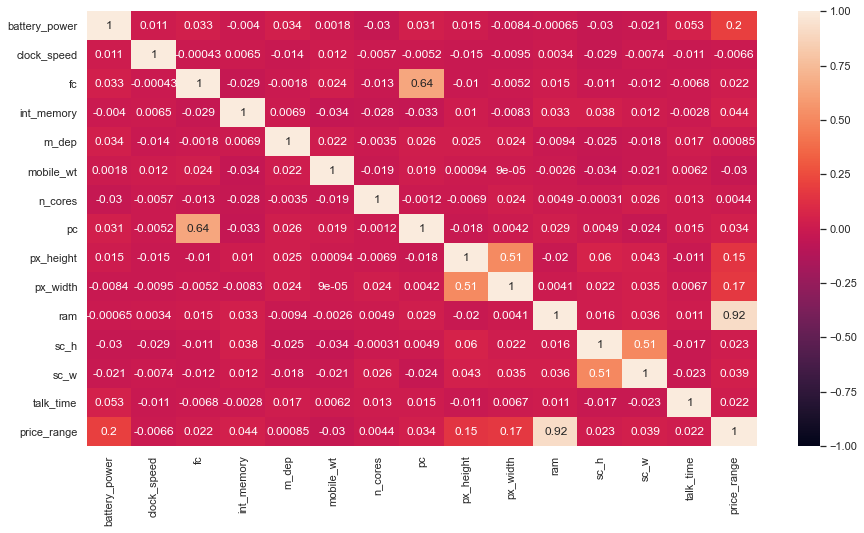

In [66]:
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax= 1)

In [96]:
def model_efficiency(y_test, y_pred):
    print("Cohen Kappa Score: ", cohen_kappa_score(y_test, y_pred))
#   print("F1 score: ", f1_score(y_test, y_pred))
    print("Classification report--> \n", classification_report(y_test, y_pred))
    cm =pd.DataFrame(confusion_matrix(y_test, y_pred), index = ["Actual:0", "Actual:1", "Actual:2", "Actual:3"], columns = ["Predicted:0", "Predicted:1","Predicted:2", "Predicted:3"])
    sns.heatmap(cm, annot =True, fmt ="d")
    plt.show()

In [69]:
final = MinMaxScaler()
final_df = pd.DataFrame(final.fit_transform(df.drop("price_range", axis =1)), columns =df.columns.drop("price_range"))
final_df = pd.concat([final_df, df.price_range], axis = 1)
final_df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,1
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,2
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,2
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,2
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,0
1996,0.977956,0.84,0.000000,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,2
1997,0.941884,0.16,0.052632,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,3
1998,0.675351,0.16,0.210526,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,0


## Building The Models

In [70]:
x =final_df.drop("price_range", axis = 1)
y = final_df.price_range
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state = 10, test_size = 0.3)

In [71]:
dt = DecisionTreeClassifier(random_state = 10)
dt_model = dt.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_pred_prob_dt = dt_model.predict_proba(x_test)[:,1]

Cohen Kappa Score:  0.7977215893303695
Classification report--> 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       140
           1       0.81      0.83      0.82       157
           2       0.83      0.75      0.79       157
           3       0.86      0.91      0.89       146

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



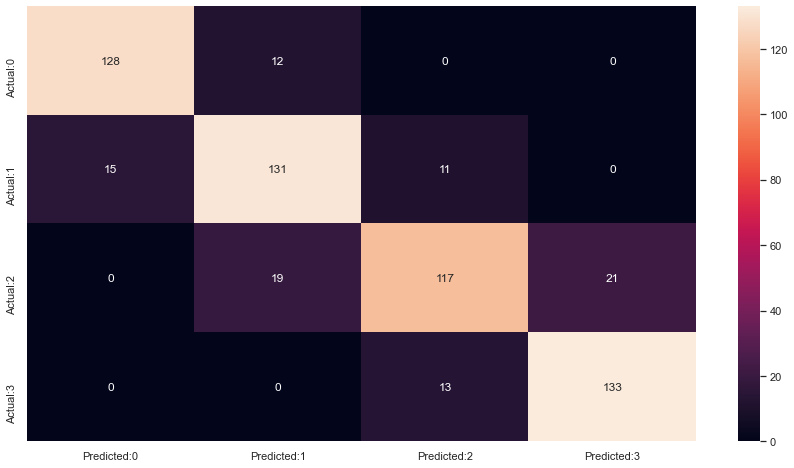

In [82]:
model_efficiency(y_test,y_pred_dt)

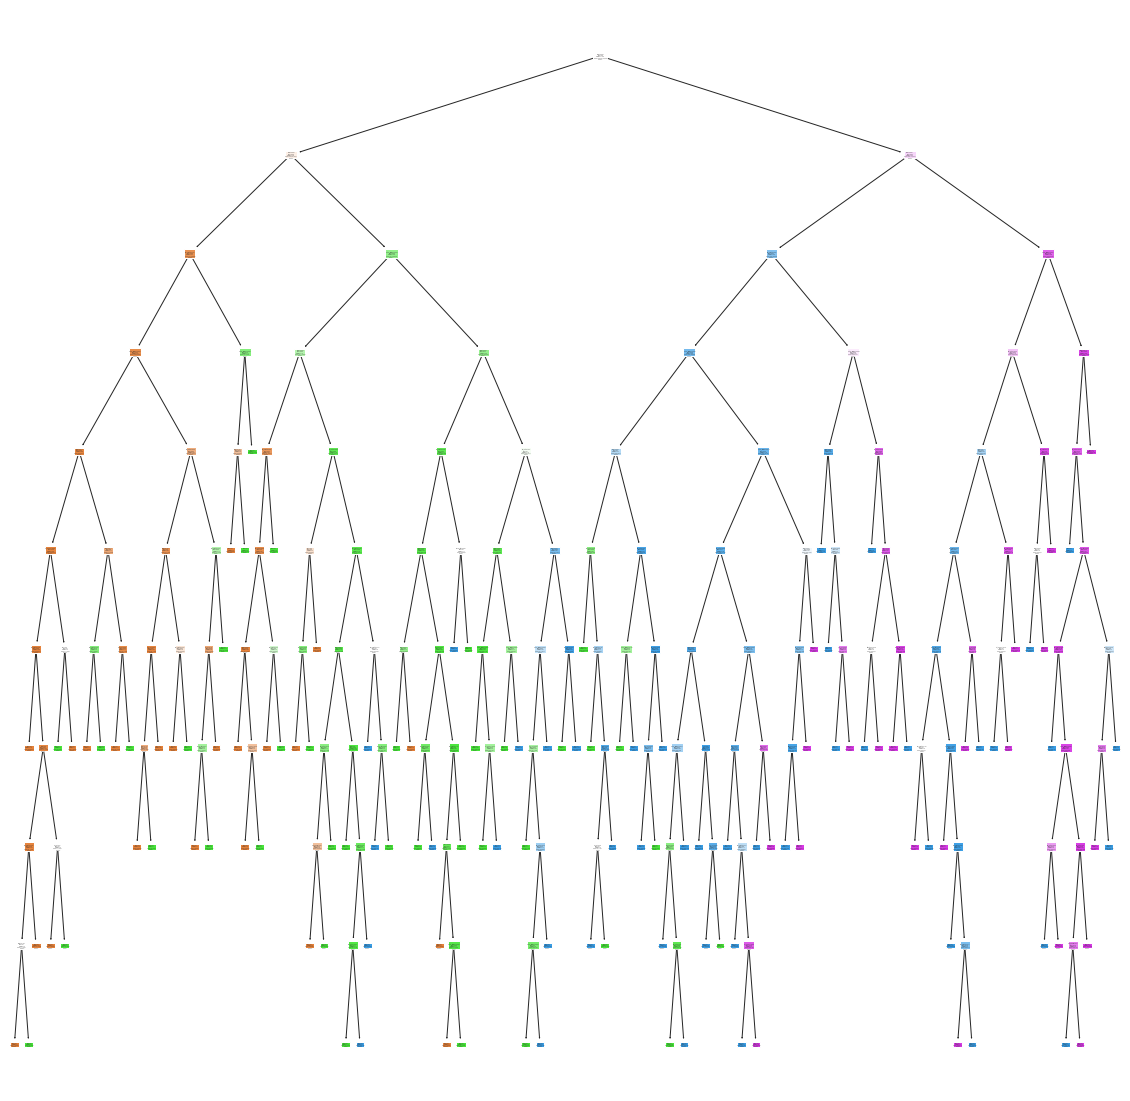

In [87]:
fig = plt.figure(figsize = (20,20))
_ = tree.plot_tree(dt_model, feature_names = x_train.columns, class_names = ["0","1","2","3"], filled =True)

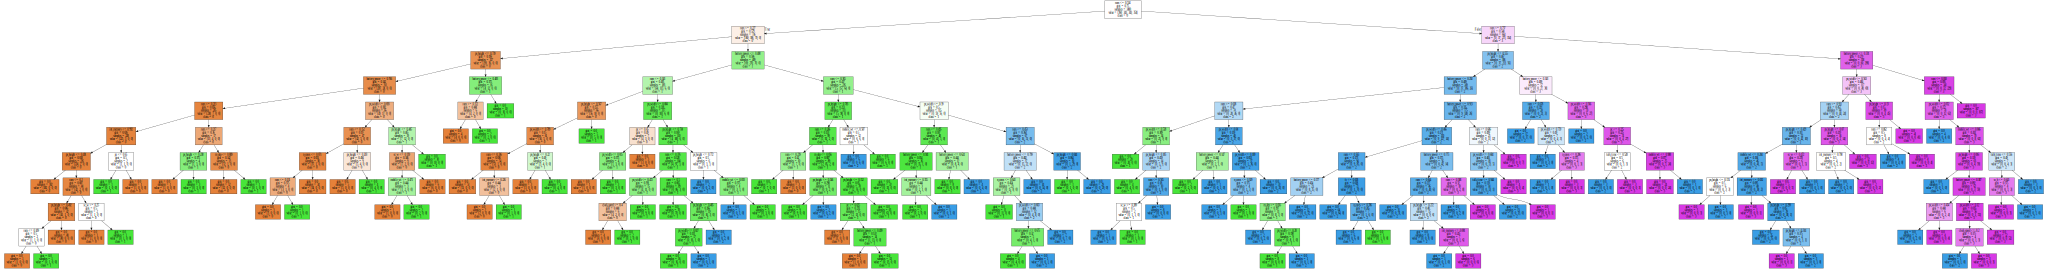

In [88]:
dot_data = tree.export_graphviz(dt_model,feature_names = x_train.columns, class_names = ["0","1","2","3"], filled =True, out_file =None)
graph = graphviz.Source(dot_data, format = "png")
graph

In [92]:
rf = RandomForestClassifier(random_state= 10)
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_prob_rf = rf_model.predict_proba(x_test)[:,1]

Cohen Kappa Score:  0.8222176130492272
Classification report--> 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       140
           1       0.81      0.83      0.82       157
           2       0.86      0.75      0.80       157
           3       0.90      0.95      0.92       146

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



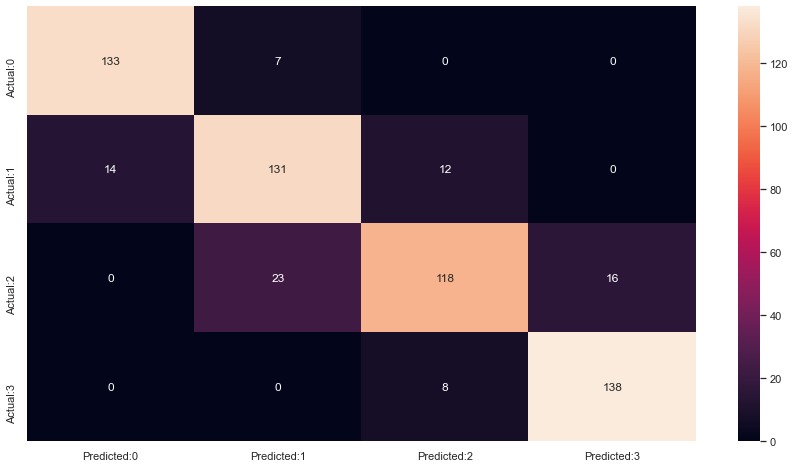

In [93]:
model_efficiency(y_test, y_pred_rf)

In [97]:
bag = BaggingClassifier(random_state= 10)
bag_model = bag.fit(x_train, y_train)
y_pred_bag = bag_model.predict(x_test)
y_pred_prob_bag = bag_model.predict_proba(x_test)[:,1]

Cohen Kappa Score:  0.8465768857331327
Classification report--> 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       140
           1       0.84      0.88      0.86       157
           2       0.88      0.82      0.84       157
           3       0.91      0.92      0.92       146

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.88       600



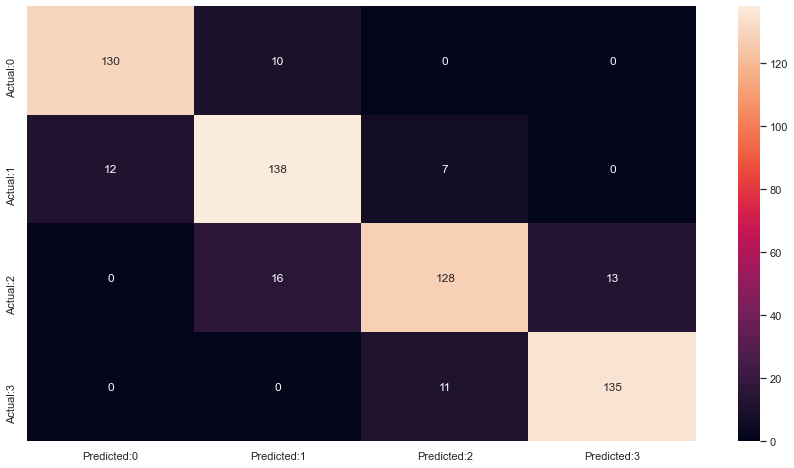

In [98]:
model_efficiency(y_test, y_pred_bag)

In [99]:
ada = AdaBoostClassifier(random_state= 10)
ada_model = ada.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)
y_pred_prob_ada = ada_model.predict_proba(x_test)[:,1]

Cohen Kappa Score:  0.6730742143773213
Classification report--> 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       140
           1       0.78      0.79      0.78       157
           2       0.65      0.66      0.65       157
           3       0.76      0.67      0.71       146

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.75      0.76      0.75       600



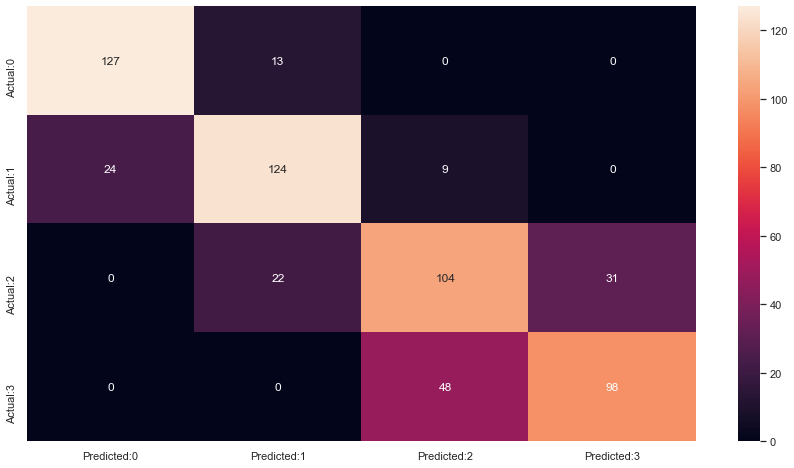

In [100]:
model_efficiency(y_test,y_pred_ada)

In [101]:
xgb = XGBClassifier(random_state= 10)
xgb_model = xgb.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
y_pred_prob_xgb = xgb_model.predict_proba(x_test)[:,1]

[13:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Cohen Kappa Score:  0.873269968317492
Classification report--> 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.88      0.90      0.89       157
           2       0.91      0.85      0.88       157
           3       0.92      0.92      0.92       146

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.90       600



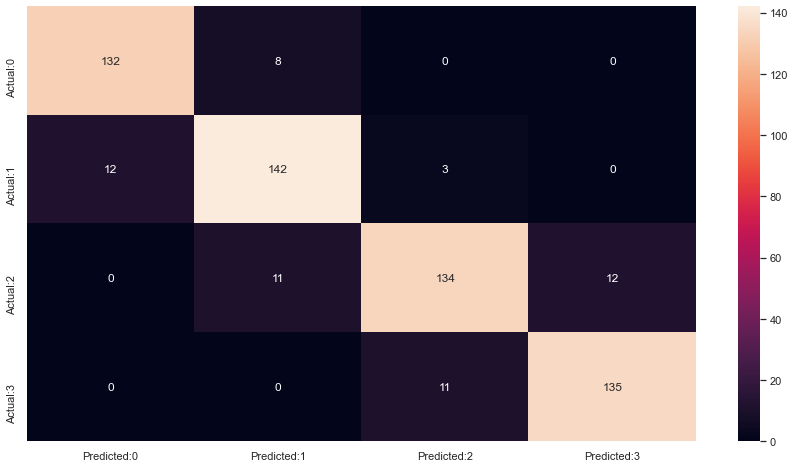

In [102]:
model_efficiency(y_test,y_pred_xgb)

In [106]:
knn = KNeighborsClassifier(n_neighbors= 45)
knn_model = knn.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
y_pred_prob_knn = knn_model.predict_proba(x_test)[:,1]

Cohen Kappa Score:  0.5489807631778711
Classification report--> 
               precision    recall  f1-score   support

           0       0.70      0.86      0.78       140
           1       0.62      0.48      0.54       157
           2       0.56      0.66      0.60       157
           3       0.80      0.66      0.73       146

    accuracy                           0.66       600
   macro avg       0.67      0.67      0.66       600
weighted avg       0.67      0.66      0.66       600



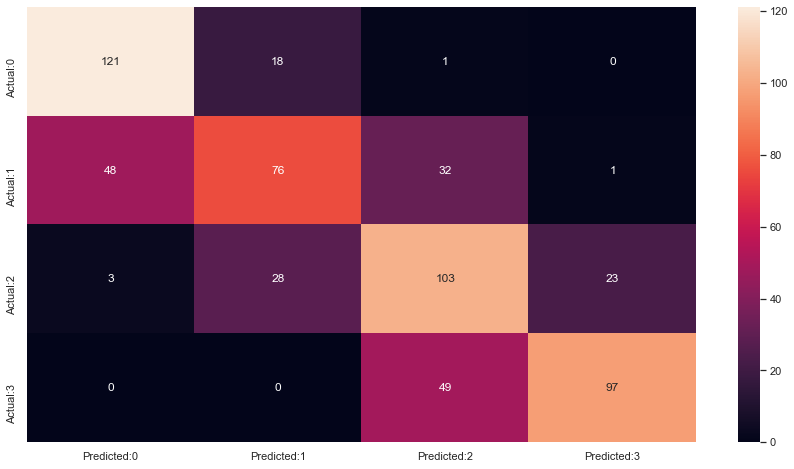

In [107]:
model_efficiency(y_test, y_pred_knn)

## Results

In [108]:
pd.DataFrame({"Model Name": ["knn Classifier", "Decision Tree Classifier","Random Forest Classifier","Bagging Classifier",
                             "AdaBoost Classifier"," XGB Classifier"],
             "Cohen Kappa Score": [cohen_kappa_score(y_test,y_pred_knn),cohen_kappa_score(y_test,y_pred_dt),
                                  cohen_kappa_score(y_test,y_pred_rf),cohen_kappa_score(y_test,y_pred_bag),
                                   cohen_kappa_score(y_test,y_pred_ada),cohen_kappa_score(y_test,y_pred_xgb)],
             "Accuracy": [accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_dt),
                          accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_bag),
                          accuracy_score(y_test,y_pred_ada),accuracy_score(y_test,y_pred_xgb)]})

,Model Name,Cohen Kappa Score,Accuracy
0,knn Classifier,0.548981,0.661667
1,Decision Tree Classifier,0.797722,0.848333
2,Random Forest Classifier,0.822218,0.866667
3,Bagging Classifier,0.846577,0.885000
4,AdaBoost Classifier,0.673074,0.755000
5,XGB Classifier,0.873270,0.905000
